# LDA1

# Set Up

## Configs

In [1]:
n_terms = 4000
n_topics = 30
max_iter = 5
OHCO = ['book_id']

In [2]:
import os
os.chdir('C:\\Users\\dwagn\\Downloads\\Project\\Project')

## Imports

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [4]:
%matplotlib inline

# Prepare Data

## Convert TOKENS to table of paragraphs

Scikit Learn wants an F1 style corpus. We create onefrom our annotated TOKEN table, keeping only regular nouns.

In [5]:
TOKENS = pd.read_csv('TOKEN2.csv')
PARAS = TOKENS[TOKENS.pos.str.match(r'^NNS?$')]\
    .groupby(OHCO[:1]).term_str\
    .apply(lambda x: ' '.join(x))\
    .to_frame()\
    .rename(columns={'term_str':'para_str'})

In [44]:
BOOKS = TOKENS[TOKENS.pos.str.match(r'^NNS?$')]\
    .groupby(OHCO[:1]).term_str\
    .apply(lambda x: ' '.join(x))\
    .to_frame()\
    .rename(columns={'term_str':'book_str'})

In [45]:
PARAS.head()

,para_str
book_id,
121,note advertisement work year publication books...
141,years thousand pounds luck county rank baronet...
42671,truth man possession fortune want wife feeling...


In [46]:
BOOKS.head()

,book_str
book_id,
121,note advertisement work year publication books...
141,years thousand pounds luck county rank baronet...
42671,truth man possession fortune want wife feeling...


## Create Vector Space

In [6]:
tfv = CountVectorizer(max_features=n_terms, stop_words='english')
tf = tfv.fit_transform(PARAS.para_str)
TERMS = tfv.get_feature_names()

# Generate Model


In [7]:
lda = LDA(n_components=n_topics, max_iter=max_iter, learning_offset=50., random_state=0)

## THETA

In [19]:
THETA = pd.DataFrame(lda.fit_transform(tf), index=PARAS.index)
THETA.columns.name = 'topic_id'

In [23]:
THETA.sample(20).style.background_gradient()

ValueError: Cannot take a larger sample than population when 'replace=False'

## PHI

In [10]:
PHI = pd.DataFrame(lda.components_, columns=TERMS)
PHI.index.name = 'topic_id'
PHI.columns.name  = 'term_str'

In [11]:
PHI.T.head().style.background_gradient()

topic_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
term_str,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
abatement,0.033333,0.033333,0.033333,0.033333,1.926443,0.033333,0.140331,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,1.033226,0.033333,0.033333,0.033333
abbey,0.033333,0.033333,0.033333,0.033333,0.343658,0.033333,29.723009,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
abbeys,0.033333,0.033333,0.033333,0.033333,0.033994,0.033333,2.032673,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
abhorrence,0.033333,0.033333,0.033333,0.033333,1.033548,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,6.033118,0.033333,0.033333,0.033333
abilities,0.033333,0.033333,0.033333,0.033333,7.101890,0.033333,0.964490,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,6.033620,0.033333,0.033333,0.033333


# Inspect Results

## Get Top Terms per Topic

In [12]:
TOPICS = PHI.stack().to_frame().rename(columns={0:'weight'})\
    .groupby('topic_id')\
    .apply(lambda x: 
           x.weight.sort_values(ascending=False)\
               .head(10)\
               .reset_index()\
               .drop('topic_id',1)\
               .term_str)

In [13]:
TOPICS

term_str,0,1,2,3,4,5,6,7,8,9
topic_id,,,,,,,,,,
0,abatement,pleasanter,plantations,plants,plate,platform,play,played,player,players
1,abatement,pleasanter,plantations,plants,plate,platform,play,played,player,players
2,abatement,pleasanter,plantations,plants,plate,platform,play,played,player,players
3,abatement,pleasanter,plantations,plants,plate,platform,play,played,player,players
4,time,house,day,sister,way,feelings,mind,man,home,room
5,abatement,pleasanter,plantations,plants,plate,platform,play,played,player,players
6,brother,time,friend,room,man,day,world,oh,moment,morning
7,abatement,pleasanter,plantations,plants,plate,platform,play,played,player,players
8,abatement,pleasanter,plantations,plants,plate,platform,play,played,player,players


In [14]:
TOPICS['label'] = TOPICS.apply(lambda x: str(x.name) + ' ' + ' '.join(x[:7].astype('str')), 1)

In [15]:
TOPICS.label

topic_id
0     0 abatement pleasanter plantations plants plat...
1     1 abatement pleasanter plantations plants plat...
2     2 abatement pleasanter plantations plants plat...
3     3 abatement pleasanter plantations plants plat...
4             4 time house day sister way feelings mind
5     5 abatement pleasanter plantations plants plat...
6              6 brother time friend room man day world
7     7 abatement pleasanter plantations plants plat...
8     8 abatement pleasanter plantations plants plat...
9     9 abatement pleasanter plantations plants plat...
10    10 abatement pleasanter plantations plants pla...
11    11 abatement pleasanter plantations plants pla...
12    12 abatement pleasanter plantations plants pla...
13    13 abatement pleasanter plantations plants pla...
14    14 abatement pleasanter plantations plants pla...
15    15 abatement pleasanter plantations plants pla...
16    16 abatement pleasanter plantations plants pla...
17    17 abatement pleasanter plantatio

## Sort Topics by Doc Weight

In [16]:
TOPICS['doc_weight_sum'] = THETA.sum()

<AxesSubplot:ylabel='label'>

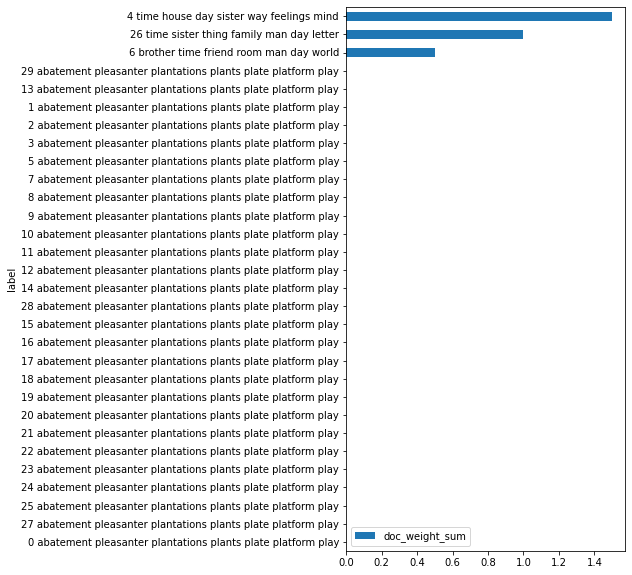

In [17]:
TOPICS.sort_values('doc_weight_sum', ascending=True).plot.barh(y='doc_weight_sum', x='label', figsize=(5,10)) 

## Explore Topics by Author

In [50]:
LIB = pd.read_csv('LIB.csv').set_index('book_id')

In [51]:
topic_cols = [t for t in range(n_topics)]

In [52]:
AUTHORS = THETA.join(LIB, on='book_id')\
    .reset_index().set_index(['author']+OHCO)\
    .groupby('author')[topic_cols].mean()\
    .T                                            
AUTHORS.index.name = 'topic_id'

In [53]:
AUTHORS['topterms'] = TOPICS[[i for i in range(10)]].apply(lambda x: ' '.join(x), 1)

In [55]:
AUTHORS.sort_values('austen', ascending=False).style.background_gradient()

author,austen,topterms
topic_id,,
4,0.499207,time house day sister way feelings mind man home room
26,0.333117,time sister thing family man day letter room father mother
6,0.167620,brother time friend room man day world oh moment morning
0,0.000002,abatement pleasanter plantations plants plate platform play played player players
16,0.000002,abatement pleasanter plantations plants plate platform play played player players
28,0.000002,abatement pleasanter plantations plants plate platform play played player players
27,0.000002,abatement pleasanter plantations plants plate platform play played player players
25,0.000002,abatement pleasanter plantations plants plate platform play played player players
24,0.000002,abatement pleasanter plantations plants plate platform play played player players


In [90]:
AUTHORS.sort_values('austen', ascending=False).style.background_gradient()

author,austen,melville,topterms
topic_id,,,
1,0.978252,0.015480,time man day sister room thing father mother house way
22,0.013390,0.092707,man world mother thee thing heart soul time things life
13,0.008238,0.355517,man time men ship day way deck sailors sea night
4,0.000004,0.065040,man sir confidence way friend sort nature kind cosmopolitan stranger
7,0.000004,0.122173,natives valley time island house day place men islanders water
25,0.000004,0.068391,lord man things men land eyes time way gods life
12,0.000004,0.091651,sea time water day boat man ship round hand way
18,0.000004,0.130026,man ship whale sea time men head boat deck way
19,0.000004,0.058963,isle isles sea tower time man tortoises bell group land


In [56]:
import plotly_express as px

In [57]:
px.scatter(AUTHORS.reset_index(), 'austen', 'melville', hover_name='topterms', text='topic_id')\
    .update_traces(mode='text')

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['topic_id', 'austen', 'topterms'] but received: melville

# Clutser Topics

In [ ]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

In [ ]:
def plot_tree(tree, labels):
    plt.figure()
    fig, axes = plt.subplots(figsize=(5, 10))
    dendrogram = sch.dendrogram(tree, labels=labels, orientation="left")
    plt.tick_params(axis='both', which='major', labelsize=14)

In [ ]:
SIMS = pdist(normalize(PHI), metric='euclidean')
TREE = sch.linkage(SIMS, method='ward')

In [ ]:
labels  = ["{}: {}".format(a,b) for a, b in zip(AUTHORS.index,  AUTHORS.topterms.tolist())]

In [ ]:
plot_tree(TREE, labels)